In [1]:
from numpy import reshape
import seaborn as sns
import pandas as pd  
import torch
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import soundfile as sf
import numpy as np
from IPython.display import display, Audio
import librosa
def ms2samples(time, rate):
    return int((time/1000)*rate)

def samples2ms(sample,rate):
    return int((sample/rate)*1000)
    
def graph_n_play(y,sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(y, sr=sr)
    plt.show()
    ipd.display(ipd.Audio(y,rate = sr))
def linear_n_play(audio_path):
    # y, sr = sf.read(audio_path)
    y, sr = librosa.load(audio_path, sr=None)
    fig, ax = plt.subplots()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()
    display(Audio(y,rate=sr))
    plt.show()

In [2]:
la = pd.read_csv("docs/T3/train_protocol.txt", sep=' ', header=None)
la.columns = ["utt", "class"]
la.head

<bound method NDFrame.head of                              utt  class
0      ADD2023_T3_T_00000000.wav      3
1      ADD2023_T3_T_00000001.wav      3
2      ADD2023_T3_T_00000002.wav      6
3      ADD2023_T3_T_00000003.wav      3
4      ADD2023_T3_T_00000004.wav      5
...                          ...    ...
22392  ADD2023_T3_T_00022395.wav      5
22393  ADD2023_T3_T_00022396.wav      2
22394  ADD2023_T3_T_00022397.wav      5
22395  ADD2023_T3_T_00022398.wav      0
22396  ADD2023_T3_T_00022399.wav      6

[22397 rows x 2 columns]>

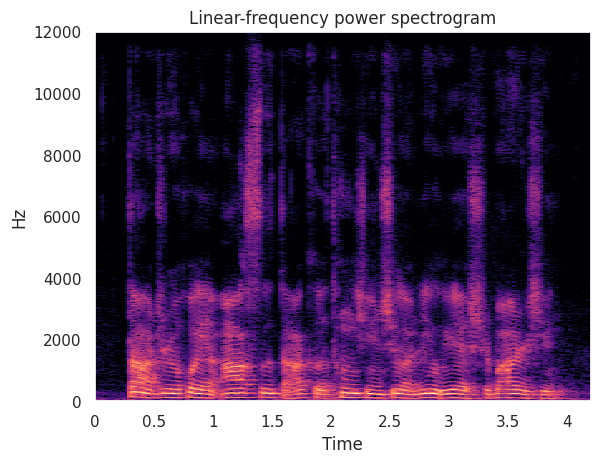

In [50]:
# Some files have formating error:
# '/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00006579.wav': Format not recognised.
# '/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00022338.wav': Format not recognised.
# '/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00004788.wav': Format not recognised.
# all above files belong to class 2

linear_n_play("/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00000009.wav")

In [54]:
from soundfile import SoundFile
fd = SoundFile("/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00000009.wav")
fd

SoundFile('/dataa/Dataset/ADD2023/Track3/train/wav/ADD2023_T3_T_00000009.wav', mode='r', samplerate=24000, channels=1, format='WAV', subtype='PCM_16', endian='FILE')

## Get audio file formating infor

In [57]:
df = pd.DataFrame()
# feat.columns = ["utt", "feats"]
mypath = "/dataa/Dataset/ADD2023/Track3/train/wav/"
# for f in tqdm(onlyfiles):
data = []
with open("docs/T3/train_protocol.txt", "r") as f:
    data = f.readlines()
for f in tqdm(data):
    # print(f)
    utt, label = f.split(" ")
    wav = join(mypath, utt)
    fd = SoundFile(wav)
    
    df = df.append({"utt": utt, "class": int(label.strip()), "samplerate": fd.samplerate, "channels": fd.channels, "subtype": fd.subtype}, ignore_index=True)
    # print(bio_inp)
df.head
df=df.astype({'class': 'int32'})
df=df.astype({'samplerate': 'int32'})
df=df.astype({'channels': 'int32'})

100%|██████████| 22397/22397 [00:50<00:00, 443.06it/s]


<bound method NDFrame.head of                              utt  class  samplerate  channels subtype
0      ADD2023_T3_T_00000000.wav    3.0     24000.0       1.0  PCM_16
1      ADD2023_T3_T_00000001.wav    3.0     24000.0       1.0  PCM_16
2      ADD2023_T3_T_00000002.wav    6.0     16000.0       1.0  PCM_16
3      ADD2023_T3_T_00000003.wav    3.0     24000.0       1.0  PCM_16
4      ADD2023_T3_T_00000004.wav    5.0     16000.0       1.0  PCM_16
...                          ...    ...         ...       ...     ...
22392  ADD2023_T3_T_00022395.wav    5.0     16000.0       1.0  PCM_16
22393  ADD2023_T3_T_00022396.wav    2.0     16000.0       1.0  PCM_16
22394  ADD2023_T3_T_00022397.wav    5.0     16000.0       1.0  PCM_16
22395  ADD2023_T3_T_00022398.wav    0.0     16000.0       1.0  PCM_16
22396  ADD2023_T3_T_00022399.wav    6.0     16000.0       1.0  PCM_16

[22397 rows x 5 columns]>

In [67]:
df.loc[(df["class"]==3 & df["samplerate"]==24000)]

SyntaxError: invalid syntax (2125784509.py, line 1)

# LFCC feature

In [4]:
import numpy as np
import os
from lfcc import lfcc
import soundfile as sf
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import seaborn as sns
import pandas as pd  

In [5]:
mypath = "./feats/t3_lfcc_normal/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [6]:
df = pd.DataFrame()
# feat.columns = ["utt", "feats"]

# for f in tqdm(onlyfiles):
for f in tqdm(onlyfiles):
    # print(f)
    if "_D_" in f:
        continue
    feat = np.load(join(mypath, f)).flatten()
    df = df.append({"utt": f.replace(".npy",".wav"), "feats": feat}, ignore_index=True)
    # print(bio_inp)
df.head

100%|██████████| 30797/30797 [00:39<00:00, 770.82it/s]


<bound method NDFrame.head of                              utt  \
0      ADD2023_T3_T_00004416.wav   
1      ADD2023_T3_T_00016370.wav   
2      ADD2023_T3_T_00005902.wav   
3      ADD2023_T3_T_00012016.wav   
4      ADD2023_T3_T_00018400.wav   
...                          ...   
22392  ADD2023_T3_T_00018135.wav   
22393  ADD2023_T3_T_00017973.wav   
22394  ADD2023_T3_T_00004640.wav   
22395  ADD2023_T3_T_00002940.wav   
22396  ADD2023_T3_T_00014605.wav   

                                                   feats  
0      [-55.33376875846968, -0.5113051964598183, -0.1...  
1      [-52.10015494129716, 4.746420529806798, 2.4275...  
2      [-47.49967671800583, 1.5821987455582724, 2.083...  
3      [-37.658634816698864, 7.25606653877543, 0.8101...  
4      [-54.24313584524619, 2.703409823611503, 1.1320...  
...                                                  ...  
22392  [-23.725751289187937, 3.462720404221735, 0.707...  
22393  [-52.8354351062318, 0.7540102068413885, 0.4273...  
22394 

In [7]:
full = la.join(df.set_index('utt'), on="utt", how="inner")
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22397 entries, 0 to 22396
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   utt     22397 non-null  object
 1   class   22397 non-null  int64 
 2   feats   22397 non-null  object
dtypes: int64(1), object(2)
memory usage: 699.9+ KB


In [48]:
np.array(full.sample().feats)[0].shape

(3560,)

# Clustering

In [9]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn import cluster

import numpy as np
import pandas as pd
import requests
import zipfile

import os
from PIL import Image
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

import hdbscan
import umap
from sklearn.neighbors import KNeighborsTransformer
import pynndescent

import networkx as nx
import cdlib.algorithms as cd

sns.set()

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'karateclub', 'wurlitzer', 'infomap', 'leidenalg'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'leidenalg'}


In [29]:
X=np.array(full["feats"].to_list())
X.shape

(22397,)

In [11]:
%%time
km_labels = cluster.KMeans(n_clusters=7).fit_predict(X)
cl_labels = cluster.AgglomerativeClustering(n_clusters=7, linkage="complete").fit_predict(X)
# sl_labels = cluster.AgglomerativeClustering(n_clusters=111, linkage="single").fit_predict(X)
db_labels = cluster.DBSCAN(eps=0.00001).fit_predict(X)
hd_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=100, cluster_selection_epsilon=0.00001).fit_predict(X)

ValueError: setting an array element with a sequence.

In [16]:
from sklearn import decomposition
print("calculating pca")
pca = decomposition.PCA(n_components=2)
pca.fit(X)
z = pca.transform(X)

calculating pca


ValueError: setting an array element with a sequence.